#**MACHINE LEARNING APPLICATIONS IN FORECASTING BANKRUPTCY RISKS OF VIETNAMESE REAL ESTATE BUSINESSES LISTED ON THE STOCK EXCHANGE**

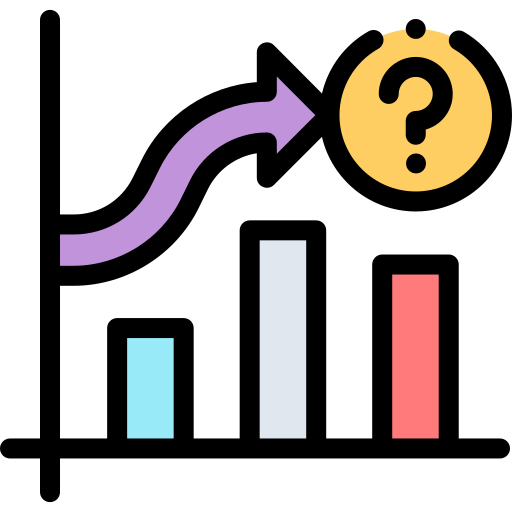

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
!pip install openpyxl
df = pd.read_excel('/content/KLTN.xlsx','Sheet2')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Mã           798 non-null    object 
 1   Tên công ty  798 non-null    object 
 2   Sàn          798 non-null    object 
 3   Năm          798 non-null    int64  
 4   WCAPAT       798 non-null    float64
 5   ALR          798 non-null    float64
 6   DTA          798 non-null    float64
 7   SDR          798 non-null    float64
 8   ROS          798 non-null    float64
 9   REAT         798 non-null    float64
 10  IT           798 non-null    float64
 11  RT           798 non-null    float64
 12  TAT          798 non-null    float64
 13  PB           798 non-null    float64
 14  MCTL         798 non-null    float64
 15  EBITA        798 non-null    float64
 16  ZSCORE       798 non-null    float64
 17  Y            798 non-null    int64  
dtypes: float64(13), int64(2), object(3)
memory usage: 

 ## **STEP 1: IDENTIFY INPUT & OUTPUT**

In [4]:
df1 =df.drop(['Mã', 'Tên công ty', 'Sàn', 'Năm','ZSCORE'],axis=1)

In [5]:
data_heat1 = df1.corr()
data_heat1

,WCAPAT,ALR,DTA,SDR,ROS,REAT,IT,RT,TAT,PB,MCTL,EBITA,Y
WCAPAT,1.000000,0.042750,-0.211892,-0.069135,0.042640,0.223175,-0.075680,0.020805,-0.004300,-0.085581,0.114958,0.148638,-0.652716
ALR,0.042750,1.000000,-0.023155,0.002691,-0.002036,-0.022187,0.001884,0.008999,-0.040731,0.001043,0.002896,0.021914,-0.045185
DTA,-0.211892,-0.023155,1.000000,0.090131,0.043559,-0.070883,-0.059906,-0.100290,0.037953,0.260855,-0.118053,0.041162,0.324792
SDR,-0.069135,0.002691,0.090131,1.000000,0.001007,-0.037136,0.003775,-0.019884,0.038002,0.021144,-0.004048,-0.021271,0.085511
ROS,0.042640,-0.002036,0.043559,0.001007,1.000000,0.237908,0.001358,0.030265,0.081743,0.046291,0.002225,0.189912,-0.075994
REAT,0.223175,-0.022187,-0.070883,-0.037136,0.237908,1.000000,-0.064325,0.187927,0.383564,0.061311,-0.023717,0.824397,-0.323990
IT,-0.075680,0.001884,-0.059906,0.003775,0.001358,-0.064325,1.000000,0.002907,0.111117,0.041656,0.016127,-0.030032,-0.039238
RT,0.020805,0.008999,-0.100290,-0.019884,0.030265,0.187927,0.002907,1.000000,0.230370,0.126538,-0.010782,0.218618,-0.062327
TAT,-0.004300,-0.040731,0.037953,0.038002,0.081743,0.383564,0.111117,0.230370,1.000000,0.095117,0.033401,0.481887,-0.141353
PB,-0.085581,0.001043,0.260855,0.021144,0.046291,0.061311,0.041656,0.126538,0.095117,1.000000,-0.004169,0.075782,-0.117669


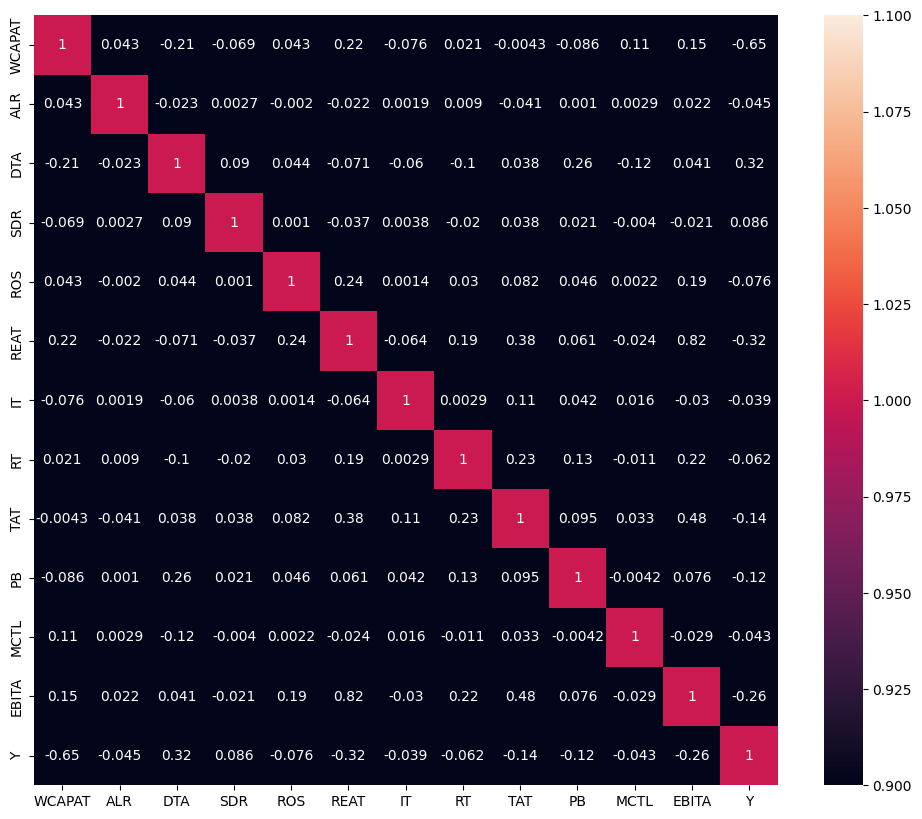

In [6]:
fig,ax= plt.subplots(figsize=(12,10))
sns.heatmap(data_heat1,vmin=1, vmax=1, annot=True)
plt.show()

In [7]:
X = df.drop(columns=['Mã', 'Tên công ty', 'Sàn', 'Năm','ZSCORE','Y','MCTL','EBITA'])
y = df['Y']
#,'MCTL','EBITA','IT','PE'

In [8]:
df.head()

,Mã,Tên công ty,Sàn,Năm,WCAPAT,ALR,DTA,SDR,ROS,REAT,IT,RT,TAT,PB,MCTL,EBITA,ZSCORE,Y
0,API,Đầu tư Châu Á - Thái Bình Dương,HNX,2011,-0.052857,2.659951,0.375947,17.721684,0.000000,0.014087,0.00,0.00,0.000000,1.05,1.735182,-0.015348,1.417985,1
1,API,Đầu tư Châu Á - Thái Bình Dương,HNX,2012,-0.124140,2.212048,0.452070,18.291241,0.000000,-0.047388,0.00,0.00,0.000000,1.14,1.376553,-0.011478,0.399402,1
2,API,Đầu tư Châu Á - Thái Bình Dương,HNX,2013,-0.036260,2.221442,0.450158,3.725391,0.000000,0.090920,0.00,0.00,0.000000,0.95,1.160482,-0.009071,1.216084,1
3,API,Đầu tư Châu Á - Thái Bình Dương,HNX,2014,-0.087934,1.944103,0.514376,5.011525,0.242418,0.001793,0.43,19.90,0.010000,0.95,0.893641,-0.012574,0.282818,1
4,API,Đầu tư Châu Á - Thái Bình Dương,HNX,2015,0.298956,2.965146,0.337251,3.581466,4.404131,0.017337,0.25,1.88,0.003917,1.05,2.068504,-0.029493,3.991404,0


In [9]:
X.head()

,WCAPAT,ALR,DTA,SDR,ROS,REAT,IT,RT,TAT,PB
0,-0.052857,2.659951,0.375947,17.721684,0.000000,0.014087,0.00,0.00,0.000000,1.05
1,-0.124140,2.212048,0.452070,18.291241,0.000000,-0.047388,0.00,0.00,0.000000,1.14
2,-0.036260,2.221442,0.450158,3.725391,0.000000,0.090920,0.00,0.00,0.000000,0.95
3,-0.087934,1.944103,0.514376,5.011525,0.242418,0.001793,0.43,19.90,0.010000,0.95
4,0.298956,2.965146,0.337251,3.581466,4.404131,0.017337,0.25,1.88,0.003917,1.05


In [10]:
y.head()

,Y
0,1
1,1
2,1
3,1
4,0


In [11]:
df.columns

Index(['Mã', 'Tên công ty', 'Sàn', 'Năm', 'WCAPAT', 'ALR', 'DTA', 'SDR', 'ROS',
       'REAT', 'IT', 'RT', 'TAT', 'PB', 'MCTL', 'EBITA', 'ZSCORE', 'Y'],
      dtype='object')

In [12]:
df.head()

,Mã,Tên công ty,Sàn,Năm,WCAPAT,ALR,DTA,SDR,ROS,REAT,IT,RT,TAT,PB,MCTL,EBITA,ZSCORE,Y
0,API,Đầu tư Châu Á - Thái Bình Dương,HNX,2011,-0.052857,2.659951,0.375947,17.721684,0.000000,0.014087,0.00,0.00,0.000000,1.05,1.735182,-0.015348,1.417985,1
1,API,Đầu tư Châu Á - Thái Bình Dương,HNX,2012,-0.124140,2.212048,0.452070,18.291241,0.000000,-0.047388,0.00,0.00,0.000000,1.14,1.376553,-0.011478,0.399402,1
2,API,Đầu tư Châu Á - Thái Bình Dương,HNX,2013,-0.036260,2.221442,0.450158,3.725391,0.000000,0.090920,0.00,0.00,0.000000,0.95,1.160482,-0.009071,1.216084,1
3,API,Đầu tư Châu Á - Thái Bình Dương,HNX,2014,-0.087934,1.944103,0.514376,5.011525,0.242418,0.001793,0.43,19.90,0.010000,0.95,0.893641,-0.012574,0.282818,1
4,API,Đầu tư Châu Á - Thái Bình Dương,HNX,2015,0.298956,2.965146,0.337251,3.581466,4.404131,0.017337,0.25,1.88,0.003917,1.05,2.068504,-0.029493,3.991404,0


In [13]:
print(df.isnull().sum())

Mã             0
Tên công ty    0
Sàn            0
Năm            0
WCAPAT         0
ALR            0
DTA            0
SDR            0
ROS            0
REAT           0
IT             0
RT             0
TAT            0
PB             0
MCTL           0
EBITA          0
ZSCORE         0
Y              0
dtype: int64


In [14]:
df =df.drop(['Mã', 'Tên công ty', 'Sàn', 'Năm','ZSCORE','MCTL','EBITA'],axis=1)
df.describe()

,WCAPAT,ALR,DTA,SDR,ROS,REAT,IT,RT,TAT,PB,Y
count,798.000000,7.980000e+02,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,0.277633,-4.152129e+03,0.499323,351.785448,-0.104574,0.045793,113.516642,7.871491,0.246505,1.173120,0.380952
std,0.230602,1.174780e+05,0.204665,4607.979753,3.655919,0.076355,1997.561197,19.756787,0.203125,1.106153,0.485925
min,-0.368698,-3.318615e+06,0.000000,0.000000,-56.944870,-0.809525,0.000000,0.000000,-0.025812,0.000000,0.000000
25%,0.114722,1.522133e+00,0.365149,0.832783,0.048054,0.009260,0.180000,1.412500,0.100000,0.480000,0.000000
50%,0.258102,1.894300e+00,0.523297,2.102207,0.137465,0.038628,0.455000,3.135000,0.200000,0.910000,0.000000
75%,0.431993,2.669135e+00,0.650666,5.872855,0.268135,0.076063,1.397500,7.110000,0.340000,1.497500,1.000000
max,0.999529,2.121488e+03,0.922980,86621.228858,14.439559,0.421898,55086.470000,406.700000,1.610000,8.450000,1.000000


In [15]:
# Export the descriptive statistics to an Excel file
description_excel = df.describe()
description_excel.to_excel("df_description.xlsx")
print("Descriptive statistics exported to df_description.xlsx")

Descriptive statistics exported to df_description.xlsx


In [16]:
data_heat = df.corr()
data_heat

,WCAPAT,ALR,DTA,SDR,ROS,REAT,IT,RT,TAT,PB,Y
WCAPAT,1.000000,0.042750,-0.211892,-0.069135,0.042640,0.223175,-0.075680,0.020805,-0.004300,-0.085581,-0.652716
ALR,0.042750,1.000000,-0.023155,0.002691,-0.002036,-0.022187,0.001884,0.008999,-0.040731,0.001043,-0.045185
DTA,-0.211892,-0.023155,1.000000,0.090131,0.043559,-0.070883,-0.059906,-0.100290,0.037953,0.260855,0.324792
SDR,-0.069135,0.002691,0.090131,1.000000,0.001007,-0.037136,0.003775,-0.019884,0.038002,0.021144,0.085511
ROS,0.042640,-0.002036,0.043559,0.001007,1.000000,0.237908,0.001358,0.030265,0.081743,0.046291,-0.075994
REAT,0.223175,-0.022187,-0.070883,-0.037136,0.237908,1.000000,-0.064325,0.187927,0.383564,0.061311,-0.323990
IT,-0.075680,0.001884,-0.059906,0.003775,0.001358,-0.064325,1.000000,0.002907,0.111117,0.041656,-0.039238
RT,0.020805,0.008999,-0.100290,-0.019884,0.030265,0.187927,0.002907,1.000000,0.230370,0.126538,-0.062327
TAT,-0.004300,-0.040731,0.037953,0.038002,0.081743,0.383564,0.111117,0.230370,1.000000,0.095117,-0.141353
PB,-0.085581,0.001043,0.260855,0.021144,0.046291,0.061311,0.041656,0.126538,0.095117,1.000000,-0.117669


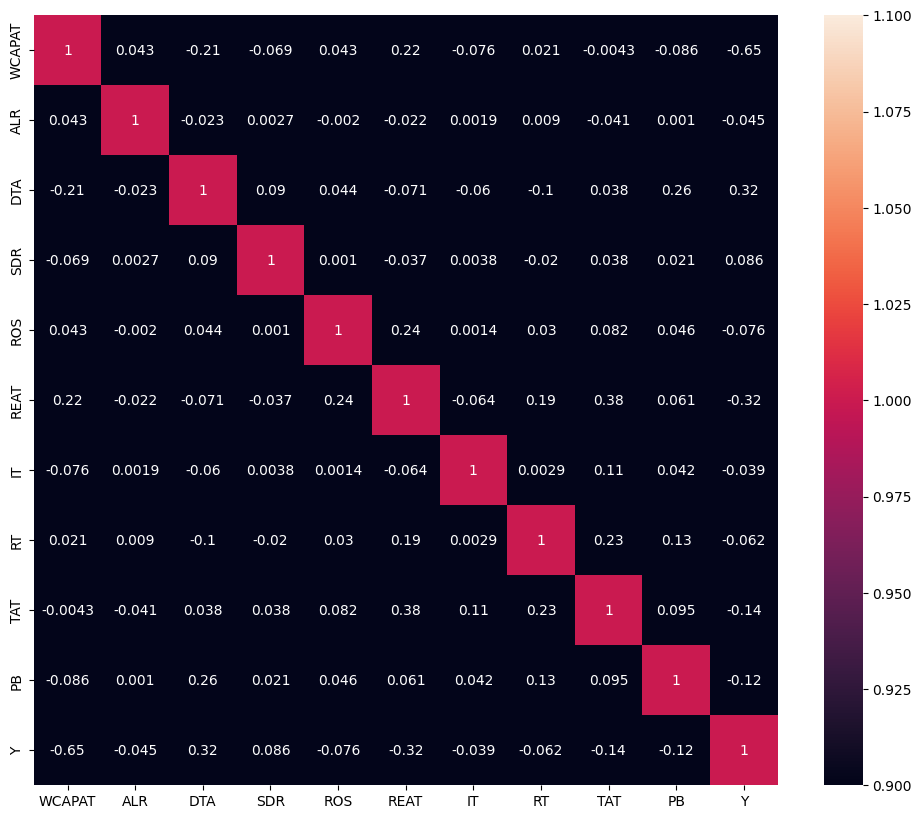

In [17]:
fig,ax= plt.subplots(figsize=(12,10))
sns.heatmap(data_heat,vmin=1, vmax=1, annot=True)
plt.show()

In [18]:
X.columns

Index(['WCAPAT', 'ALR', 'DTA', 'SDR', 'ROS', 'REAT', 'IT', 'RT', 'TAT', 'PB'], dtype='object')

In [19]:
#data_heat1 = df1.corr()
#data_heat1

In [20]:
correlation_with_target = df.corr()['Y']

In [21]:
top_correlated_variables=correlation_with_target.sort_values(ascending=False).head(14)

In [22]:
#print("top correlated variables with Y")
#print(top_correlated_variables)

## **STEP 2: SPLIT DATA**

In [23]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

## **STEP 3: INITIALIZE MODELS**

### **LOGISTIC REGRESSION**

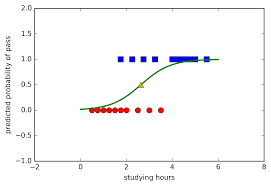

In [24]:
#Logistic
from sklearn.linear_model import LogisticRegression
model_Logistic=LogisticRegression()


In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
cv_scores = cross_val_score(model_Logistic, X_train, y_train, cv=5)  # 5 folds
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.875      0.8515625  0.90625    0.86614173 0.81889764]
Mean CV score: 0.8635703740157481


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [26]:
# Tạo mô hình logistic regression với L2 regularization (mặc định)
model_l2 = LogisticRegression(penalty='l2', C=1.0)  # C điều chỉnh mức độ regularization
model_l2.fit(X_train, y_train)

# Dự đoán và đánh giá
accuracy_l2 = model_l2.score(X_test, y_test)
print("Accuracy with L2 regularization:", accuracy_l2)

# Tạo mô hình logistic regression với L1 regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_l1.fit(X_train, y_train)

# Dự đoán và đánh giá
accuracy_l1 = model_l1.score(X_test, y_test)
print("Accuracy with L1 regularization:", accuracy_l1)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with L2 regularization: 0.8875
Accuracy with L1 regularization: 0.94375


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### **DECISION TREE CLASSIFICATION**

In [27]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree = DecisionTreeClassifier(ccp_alpha=0.0,
                                              criterion='gini',
                                              max_depth=7,
                                              max_features='sqrt',
                                              min_samples_leaf=4,
                                              min_samples_split=10)

In [28]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(tree, param_grid_dt, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Tham số tốt nhất:", best_params)

Tham số tốt nhất: {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1350 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1350 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/u

### **RANDOM FOREST CLASSIFIER**

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

### **NAIVE BAYES**

In [31]:
#Naive Bayes
from sklearn.naive_bayes import BernoulliNB
model_Bayes = BernoulliNB()

### **GRADIENT BOOSTING**

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
model_GB = GradientBoostingClassifier(random_state=42)

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
   'learning_rate': [0.01, 0.1],
   'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
   'min_samples_leaf': [1, 2],
   'subsample': [0.8, 1.0],
}
gb_model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_

##**STEP 4: TRAINING MODEL**

### **LOGISTIC REGRESSION**

In [34]:
model_Logistic=model_l1.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [35]:
print("Coefficients:",model_Logistic.coef_)
print("Intercept:",model_Logistic.intercept_)

Coefficients: [[-1.25773521e+01 -2.13155916e-04  5.28606578e+00  6.23896039e-05
  -3.87989844e-02 -8.06697419e+00 -1.26600471e-03 -4.00292838e-03
  -1.06608218e+00 -7.05904026e-01]]
Intercept: [1.04763433]


In [36]:
X_train.columns

Index(['WCAPAT', 'ALR', 'DTA', 'SDR', 'ROS', 'REAT', 'IT', 'RT', 'TAT', 'PB'], dtype='object')

### **DECISION TREE CLASSIFICATION**

In [37]:
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=kfold, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1350 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1350 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/u

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [38]:
best_model_dt = grid_search_dt.best_estimator_
accuracy_dt = best_model_dt.score(X_test, y_test)
print("Best Decision Tree model:", best_model_dt)
print("Accuracy:", accuracy_dt)

Best Decision Tree model: DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_features='log2',
                       min_samples_split=5)
Accuracy: 0.86875


In [39]:
# trực quan hóa cây quyết định
from IPython.display import Image
import pydotplus
from sklearn import tree
from sklearn import datasets
#pip install pydotplus

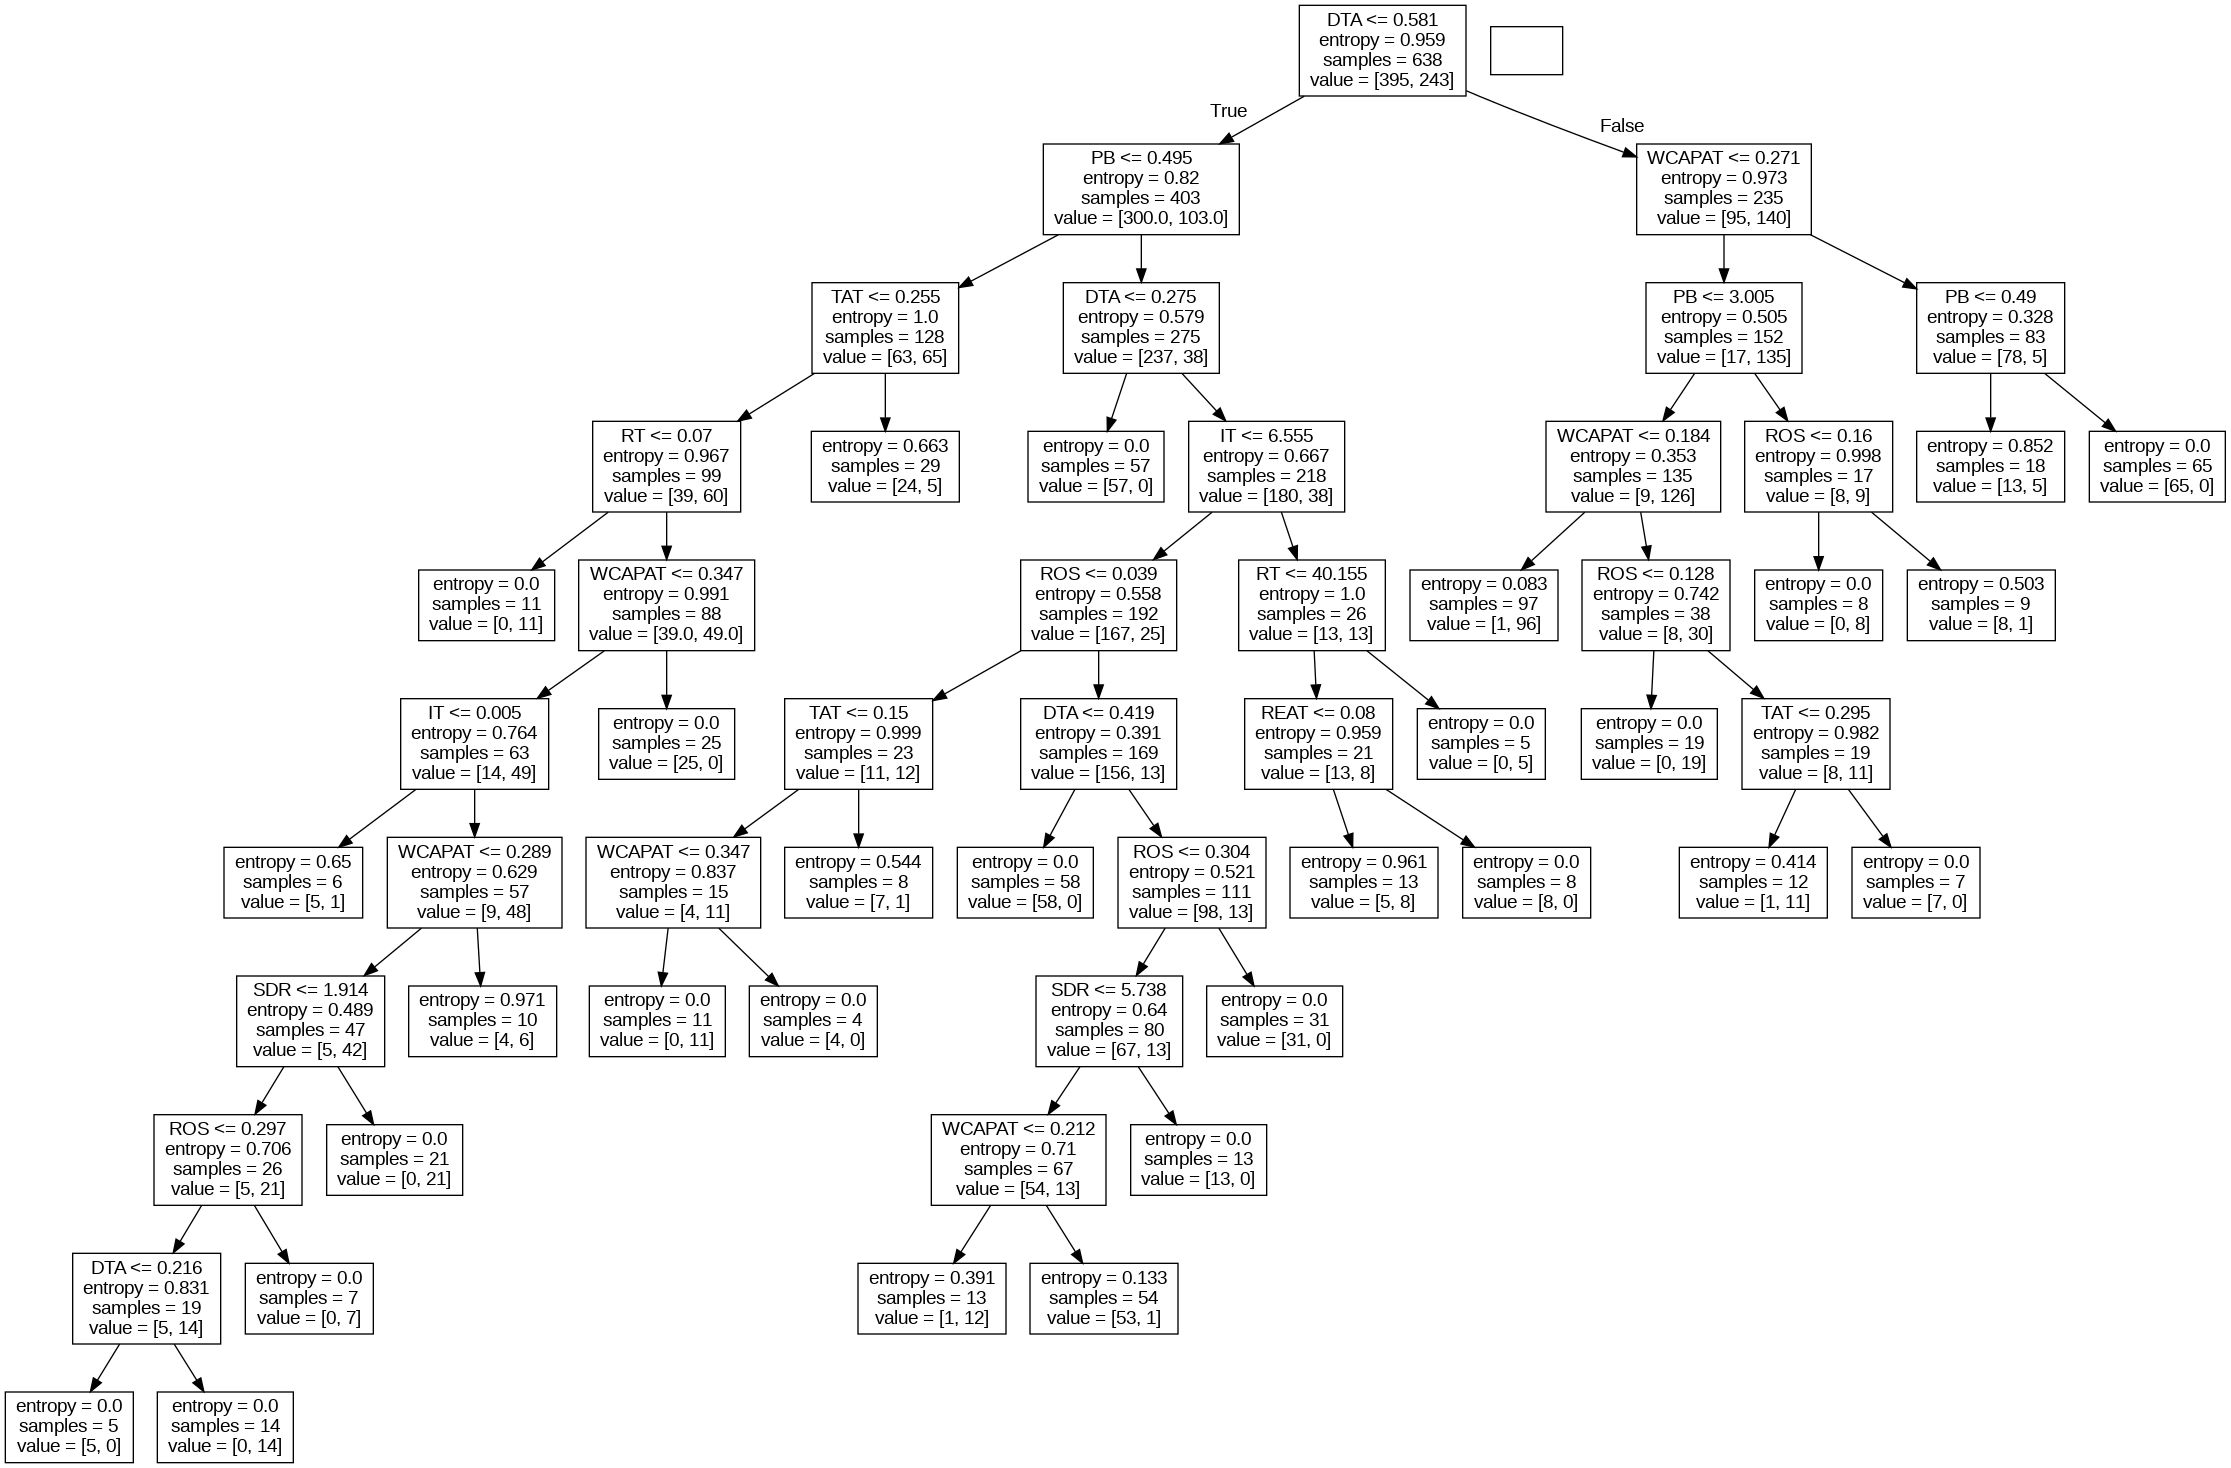

In [40]:
dot_data = tree.export_graphviz(best_model_dt, out_file=None, feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### **NAIVE BAYES**

In [41]:
model_Bayes.fit(X_train, y_train)

BernoulliNB()

### **RANDOM FOREST CLASSIFIER**

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### **GRADIENT BOOSTING**

In [43]:
gb_model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_

##**STEP 5: VERIFY MODELS**

In [44]:
#Kiểm định mức độ dự báo chính xác của mô hình
yhat_test_Logistic=model_Logistic.predict(X_test)
yhat_test_DecisionTree=best_model_dt.predict(X_test)
yhat_test_randomforest=rf_classifier.predict(X_test)
yhat_test_NaiveBayes=model_Bayes.predict(X_test)
yhat_test_GB = best_gb_model.predict(X_test)

### **LOGISTIC REGRESSION**

<Axes: xlabel='Predicted', ylabel='Actual'>

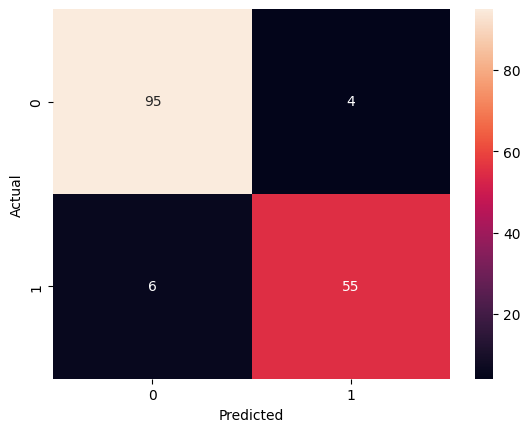

In [45]:
#Logistic
from sklearn import metrics
confusion_matrix_Logistic = pd.crosstab(y_test, yhat_test_Logistic, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_Logistic, annot=True)

In [46]:
logis_prob=model_Logistic.predict_proba(X_test)[:,1]
print(classification_report(y_test,yhat_test_Logistic,digits=4))

              precision    recall  f1-score   support

           0     0.9406    0.9596    0.9500        99
           1     0.9322    0.9016    0.9167        61

    accuracy                         0.9375       160
   macro avg     0.9364    0.9306    0.9333       160
weighted avg     0.9374    0.9375    0.9373       160



### **DECISION TREE CLASSIFICATION**

<Axes: xlabel='Predicted', ylabel='Actual'>

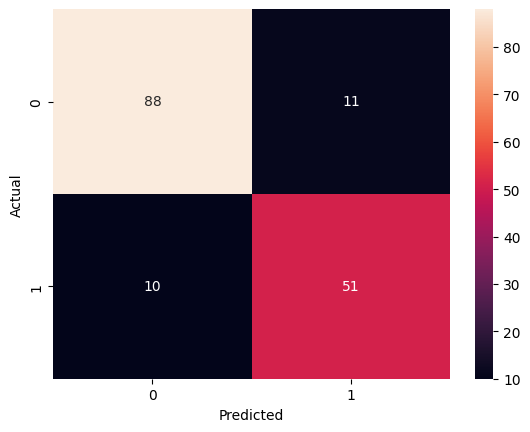

In [47]:
#Decision Tree
confusion_matrix_DecisionTree = pd.crosstab(y_test, yhat_test_DecisionTree, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_DecisionTree, annot=True)

In [48]:
DecisionTree_prob=best_model_dt.predict_proba(X_test)[:,1]
print(classification_report(y_test,yhat_test_DecisionTree,digits=4))

              precision    recall  f1-score   support

           0     0.8980    0.8889    0.8934        99
           1     0.8226    0.8361    0.8293        61

    accuracy                         0.8688       160
   macro avg     0.8603    0.8625    0.8613       160
weighted avg     0.8692    0.8688    0.8690       160



### **RANDOM FOREST CLASSIFIER**

<Axes: xlabel='Predicted', ylabel='Actual'>

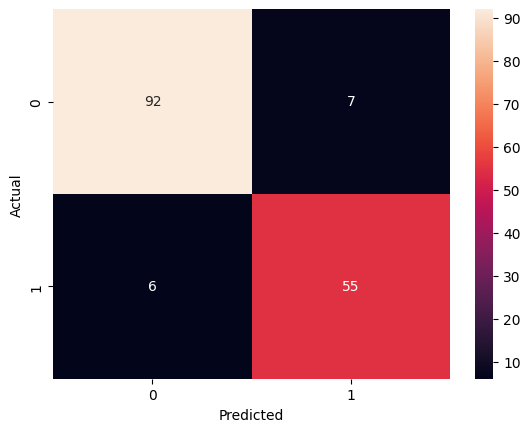

In [49]:
#RandomForest
confusion_matrix_randomforest = pd.crosstab(y_test, yhat_test_randomforest, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_randomforest, annot=True)

In [50]:
rf_prob=rf_classifier.predict_proba(X_test)[:,1]
print(classification_report(y_test,yhat_test_randomforest,digits=4))

              precision    recall  f1-score   support

           0     0.9388    0.9293    0.9340        99
           1     0.8871    0.9016    0.8943        61

    accuracy                         0.9187       160
   macro avg     0.9129    0.9155    0.9142       160
weighted avg     0.9191    0.9187    0.9189       160



### **NAIVE BAYES**

Acurracy score 0.68125


<Axes: xlabel='Predicted', ylabel='Actual'>

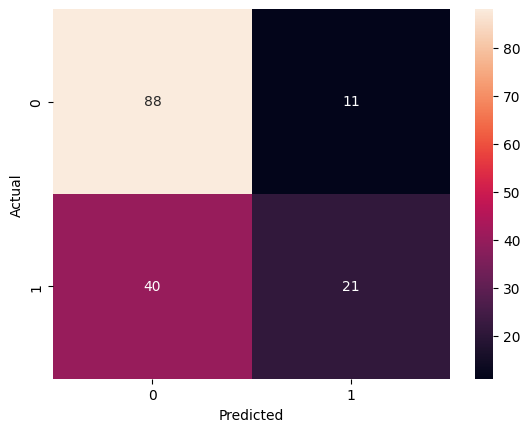

In [51]:
#Naive Bayes
print('Acurracy score', model_Bayes.score(X_test, y_test))
confusion_matrix_NaiveBayes = pd.crosstab(y_test, yhat_test_NaiveBayes, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_NaiveBayes, annot=True)

In [52]:
bayes_prob=model_Bayes.predict_proba(X_test)[:,1]
print(classification_report(y_test,yhat_test_NaiveBayes,digits=4))

              precision    recall  f1-score   support

           0     0.6875    0.8889    0.7753        99
           1     0.6562    0.3443    0.4516        61

    accuracy                         0.6813       160
   macro avg     0.6719    0.6166    0.6135       160
weighted avg     0.6756    0.6813    0.6519       160



### **GRADIENT BOOSTING**

Acurracy score 0.9125


<Axes: xlabel='Predicted', ylabel='Actual'>

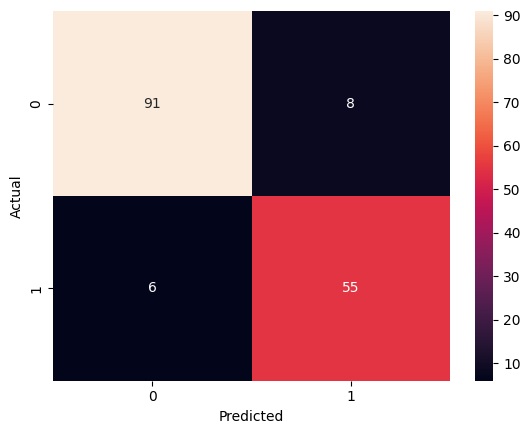

In [53]:
print('Acurracy score', best_gb_model.score(X_test, y_test))
confusion_matrix_GB = pd.crosstab(y_test, yhat_test_GB, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_GB, annot=True)

In [54]:
GB_prob=best_gb_model.predict_proba(X_test)[:,1]
print(classification_report(y_test,yhat_test_GB,digits=4))

              precision    recall  f1-score   support

           0     0.9381    0.9192    0.9286        99
           1     0.8730    0.9016    0.8871        61

    accuracy                         0.9125       160
   macro avg     0.9056    0.9104    0.9078       160
weighted avg     0.9133    0.9125    0.9128       160



In [55]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np # Import numpy để xử lý trường hợp chia cho 0

# Giả sử các mô hình (model_Logistic, best_model, rf_classifier,
# model_NaiveBayes, model_NeuralNetwork, model_GradientBoosting) đã được khởi tạo và huấn luyện
# Giả sử bạn đã có X_train, X_test, y_train, y_test

# Update the list of models to evaluate
models = {
    "Decision Tree": best_model,  # Using the best_model from GridSearchCV
    "Random Forest": rf_classifier,
    "Naive Bayes": model_Bayes,
    "Gradient Boosting": best_gb_model,
    "Logistic Regression": model_Logistic
}

# Dictionary to store results (re-initialize to include all models)
results = {
    "Model": [],
    "Set": [],
    "Accuracy": [],
    "Recall": [],
    "F1-Score": [],
    "Precision": [],
    "Specificity": [] # Thêm cột Specificity vào đây
}

# Iterate through the models and calculate metrics
for model_name, model in models.items():
    # --- Tính toán cho tập huấn luyện ---
    y_train_pred = model.predict(X_train)

    # Tính Specificity cho tập huấn luyện
    tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()
    # Tránh chia cho 0 khi tính Specificity
    specificity_train = tn_train / (tn_train + fp_train) if (tn_train + fp_train) > 0 else 0

    # Xử lý trường hợp chia cho 0 cho Precision, Recall, F1-Score (tùy chọn, nhưng nên làm)
    # Sử dụng zero_division=0 để trả về 0 khi chia cho 0
    precision_train = precision_score(y_train, y_train_pred, zero_division=0)
    recall_train = recall_score(y_train, y_train_pred, zero_division=0)
    f1_train = f1_score(y_train, y_train_pred, zero_division=0)


    results["Model"].append(model_name)
    results["Set"].append("Train")
    results["Accuracy"].append(accuracy_score(y_train, y_train_pred))
    results["Recall"].append(recall_train)
    results["F1-Score"].append(f1_train)
    results["Precision"].append(precision_train)
    results["Specificity"].append(specificity_train) # Thêm Specificity tập huấn luyện

    # --- Tính toán cho tập kiểm tra ---
    y_test_pred = model.predict(X_test)

    # Tính Specificity cho tập kiểm tra
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()
    # Tránh chia cho 0 khi tính Specificity
    specificity_test = tn_test / (tn_test + fp_test) if (tn_test + fp_test) > 0 else 0

    # Xử lý trường hợp chia cho 0 cho Precision, Recall, F1-Score trên tập test
    precision_test = precision_score(y_test, y_test_pred, zero_division=0)
    recall_test = recall_score(y_test, y_test_pred, zero_division=0)
    f1_test = f1_score(y_test, y_test_pred, zero_division=0)


    results["Model"].append(model_name)
    results["Set"].append("Test")
    results["Accuracy"].append(accuracy_score(y_test, y_test_pred))
    results["Recall"].append(recall_test)
    results["F1-Score"].append(f1_test)
    results["Precision"].append(precision_test)
    results["Specificity"].append(specificity_test)


metrics_df = pd.DataFrame(results)
metrics_df

,Model,Set,Accuracy,Recall,F1-Score,Precision,Specificity
0,Decision Tree,Train,0.945141,0.909465,0.926625,0.944444,0.967089
1,Decision Tree,Test,0.893750,0.836066,0.857143,0.879310,0.929293
2,Random Forest,Train,1.000000,1.000000,1.000000,1.000000,1.000000
3,Random Forest,Test,0.918750,0.901639,0.894309,0.887097,0.929293
4,Naive Bayes,Train,0.708464,0.353909,0.480447,0.747826,0.926582
5,Naive Bayes,Test,0.681250,0.344262,0.451613,0.656250,0.888889
6,Gradient Boosting,Train,1.000000,1.000000,1.000000,1.000000,1.000000
7,Gradient Boosting,Test,0.912500,0.901639,0.887097,0.873016,0.919192
8,Logistic Regression,Train,0.937304,0.888889,0.915254,0.943231,0.967089
9,Logistic Regression,Test,0.937500,0.901639,0.916667,0.932203,0.959596


In [56]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

def calculate_metrics(model, X_test, y_test):
  """Calculates various classification metrics for a given model."""
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  # Calculate specificity
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  specificity = tn / (tn + fp)

  return accuracy, recall, f1, precision, specificity


# Calculate metrics for each trained model on the test set
decision_tree_metrics = calculate_metrics(grid_search_dt, X_test, y_test)
random_forest_metrics = calculate_metrics(rf_classifier, X_test, y_test)
naive_bayes_metrics = calculate_metrics(model_Bayes, X_test, y_test)
gradient_boosting_metrics = calculate_metrics(best_gb_model, X_test, y_test)
logistic_metrics = calculate_metrics(model_Logistic, X_test, y_test)

# Create a dictionary to store the results
results = {
    'Model': ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Boosting','Logistic Regression'],
    'Accuracy': [ decision_tree_metrics[0], random_forest_metrics[0], naive_bayes_metrics[0], gradient_boosting_metrics[0], logistic_metrics[0]],
    'Recall': [decision_tree_metrics[1], random_forest_metrics[1], naive_bayes_metrics[1], gradient_boosting_metrics[1], logistic_metrics[1]],
    'F1 Score': [decision_tree_metrics[2], random_forest_metrics[2], naive_bayes_metrics[2], gradient_boosting_metrics[2], logistic_metrics[2]],
    'Precision': [decision_tree_metrics[3], random_forest_metrics[3], naive_bayes_metrics[3], gradient_boosting_metrics[3], logistic_metrics[3]],
    'Specificity': [decision_tree_metrics[4], random_forest_metrics[4], naive_bayes_metrics[4], gradient_boosting_metrics[4], logistic_metrics[4]]
}

# Create a pandas DataFrame from the results dictionary
metrics1_df = pd.DataFrame(results)

# Display the DataFrame
print(metrics1_df)
metrics_df1 = metrics1_df
metrics_df1.to_excel("metrics_df1.xlsx")

                 Model  Accuracy    Recall  F1 Score  Precision  Specificity
0        Decision Tree   0.86875  0.836066  0.829268   0.822581     0.888889
1        Random Forest   0.91875  0.901639  0.894309   0.887097     0.929293
2          Naive Bayes   0.68125  0.344262  0.451613   0.656250     0.888889
3    Gradient Boosting   0.91250  0.901639  0.887097   0.873016     0.919192
4  Logistic Regression   0.93750  0.901639  0.916667   0.932203     0.959596


### **ROC CURVE AND UAC**

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [58]:
model_probs = [ DecisionTree_prob, rf_prob ,bayes_prob,GB_prob, logis_prob]
model_names = [ model_DecisionTree,rf_classifier, model_Bayes, model_GB, model_Logistic]


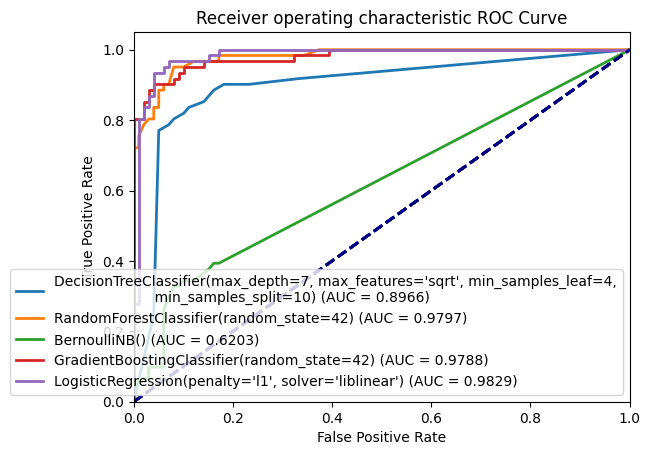

<Figure size 640x480 with 0 Axes>

In [59]:
def plot_roc_auc(y_test, yhat_test, model_name):
  plt.figure()
for i, probs in enumerate(model_probs):
  fpr, tpr,_ = roc_curve(y_test, probs)
  roc_auc = roc_auc_score(y_test, probs)
  plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.4f)'% (model_names[i], roc_auc))
  plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC Curve')
plt.legend(loc="lower right")
plt.show()

plot_roc_auc(y_test, model_probs, model_names)


## **RESULTS OF LOGIT MODEL**

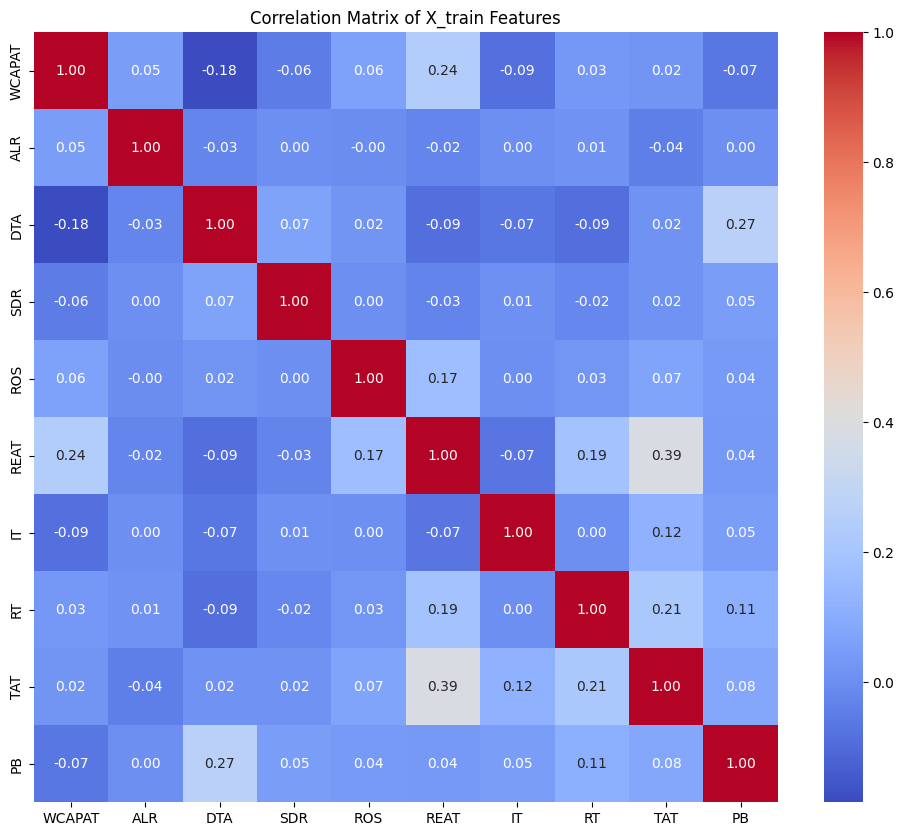

Highly correlated pairs (> 0.8):
{}


In [60]:
# Check the correlation matrix of the training features
correlation_matrix_xtrain = X_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_xtrain, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of X_train Features')
plt.show()

# Identify highly correlated pairs (adjust the threshold as needed)
threshold = 0.8
highly_correlated_pairs = {}
for i in range(len(correlation_matrix_xtrain.columns)):
    for j in range(i):
        if abs(correlation_matrix_xtrain.iloc[i, j]) > threshold:
            colname_i = correlation_matrix_xtrain.columns[i]
            colname_j = correlation_matrix_xtrain.columns[j]
            highly_correlated_pairs[(colname_i, colname_j)] = correlation_matrix_xtrain.iloc[i, j]

print("Highly correlated pairs (> {}):".format(threshold))
print(highly_correlated_pairs)


## **STEP 6: UTILIZE LOGIT MODEL**

NO

In [61]:
#LOGISTIC REGRESSION
X_new = [[0.816225512,	5.080620135,	0.196826366, 0.512130572,	0.034712901,	0.152913364,	191.13,	31.17,	0.96,	1.26]]
y_new = model_Logistic.predict(X_new)
if y_new[0] == 1:
  print('This real estate enterprise exists the bankruptcy risk')
else:
  print('This real estate enterprise does not exist the bankruptcy risk')

This real estate enterprise does not exist the bankruptcy risk


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


YES

In [62]:
#LOGISTIC REGRESSION
X_new = [[0.106676468,	1.838536974,	0.543910737,	1.54578676,	0.133582215,	0.110491034,	1.9,	7.06,	0.55,	1.03]]
y_new = model_Logistic.predict(X_new)
if y_new[0] == 1:
  print('This real estate enterprise exists the bankruptcy risk')
else:
  print('This real estate enterprise does not exist the bankruptcy risk')

This real estate enterprise exists the bankruptcy risk


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
